# Predictor System

In [3]:
# Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

In [5]:
# Load the pretrained model weights
model = load_model('/kaggle/input/unet-model/UNET_LANE_DETECTOR_WEIGHTS.h5') # Give path to the model

# Lane Predictor for a Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


True

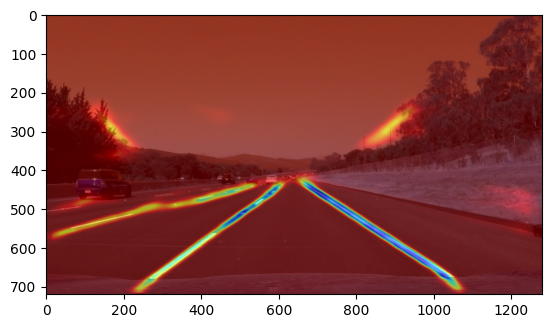

In [21]:
# preprocess the image
def preprocess_image(image):
#     image = cv2.imread(image)
    image_resized = cv2.resize(image, (256, 256)) 
    image_normalized = image_resized / 255.0  # Normalize to [0, 1]
    image_batch = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
    return image_batch

# predict mask for a single image
def predict_mask(image, model):
    image_preprocessed = preprocess_image(image)
    mask = model.predict(image_preprocessed)
    mask = np.squeeze(mask)  # Remove batch dimension
    mask = (mask - np.min(mask)) / (np.max(mask) - np.min(mask))  # Normalize to [0, 1]
    return mask

# overlay mask on the image
def overlay_mask_on_image(image, mask):
    mask_colored = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    mask_colored = mask_colored.astype(np.float64)  # Ensure mask is of same type as image
    overlay = cv2.addWeighted(image.astype(np.float64), 0.4, mask_colored, 0.6, 0.0)
    return np.uint8(overlay)

image_path = '/kaggle/input/road-pics/road1.jpeg' # Give path to imput image
image = cv2.imread(image_path)
#  Predict the mask for the image
mask = predict_mask(image, model)

# Resize mask to match the image size
mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))

# Overlay mask on the image
masked_image = overlay_mask_on_image(image, mask_resized)

# Display the masked image
plt.imshow(masked_image)

# Save the maksed image
cv2.imwrite('/kaggle/working/masked_image_1.png', masked_image)

# Lane Predictor for a Video

In [18]:
# preprocess the frame
def preprocess_frame(frame):
    frame_resized = cv2.resize(frame, (256, 256))  
    frame_normalized = frame_resized / 255.0  # Normalize to [0, 1]
    frame_batch = np.expand_dims(frame_normalized, axis=0)  # Add batch dimension
    return frame_batch

# predict mask for a single frame
def predict_mask(frame, model):
    frame_preprocessed = preprocess_frame(frame)
    mask = model.predict(frame_preprocessed)
    mask = np.squeeze(mask)  # Remove batch dimension
    mask = (mask - np.min(mask)) / (np.max(mask) - np.min(mask))  # Normalize to [0, 1]
    return mask

# overlay mask on the frame
def overlay_mask_on_frame(frame, mask):
    mask_colored = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    mask_colored = mask_colored.astype(np.float64)  # Ensure mask is of same type as frame
    overlay = cv2.addWeighted(frame.astype(np.float64), 0.4, mask_colored, 0.6, 0.0)
    return np.uint8(overlay)

# Read input video
input_video_path = '/kaggle/input/video-file/1.mp4'  # Update with the correct video path
output_video_path = 'output_video_1.mp4' # Give output path for the video

cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict the mask for the current frame
    mask = predict_mask(frame, model)

    # Resize mask to match the frame size
    mask_resized = cv2.resize(mask, (frame.shape[1], frame.shape[0]))

    # Overlay mask on the frame
    frame_with_mask = overlay_mask_on_frame(frame, mask_resized)

    # Write the frame to the output video
    out.write(frame_with_mask)

# Release resources
cap.release()
out.release()

# Output path
print(f'Output video saved at: {output_video_path}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━